<div class="alert alert-success">
    
## Практическое домашнее задание 2: 

  Линейная регрессия, scikit-learn, градиентный спуск

### Общая информация

Дата выдачи: 08.03.2023

Мягкий дедлайн: 23:59MSK 15.03.2023

Жесткий дедлайн: 23:59MSK 22.03.2023

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

Библиотека **Sklearn:**

sklearn.liner_model

linear_model:

- RidgeClassifier
- SGDClassifier
- SGDRegressor
- LinearRegression
- LogisticRegression
- Lasso
и т.д.

Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### О задании
В этом задании нужно будет проанализировать данные и выделить из них полезные признаки. И научитесь и закрепите знания с помощью реализации обучения линейной регрессии с помощью различных вариантов градиентного спуска.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Стоит обратить внимание**, что в каждом подразделе этого домашнего задания присутствуют не только задачи, но и вопросы. Вопросы расширяют задачи и ориентированы на интерпретируемость и обоснование вашего кода. Поэтому отвечать на них является обязательным условием. За отсутствие выводов и ответов на вопросы баллы могут быть снижены. Ну и в другом случае, если Вы, напротив, ответите на вопросы, но не напишете корректный код к соответствующим задачам, то баллы за такое выставляться не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате hw-practice-02-linregr-gd-Username.ipynb, где Username — ваша фамилия, лучше отправлять в телеграм @kronesine.  

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

# Задание 1. Подготовка данных (1 балл)

**Задание 1 (1.5 балла, включая ответы на вопросы)**. В данном разделе будем выделять признаки из такого датасета: [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview). 
Цель: предсказать длительность поездки на такси. 
Следует скачать обучающую выборку из этого соревнования и загрузить ее:

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv('nyc-taxi-trip-duration/train/train.csv')

Важно: в данных имеются стоблцы `pickup_datetime` и `dropoff_datetime`. Колонку `dropoff_datetime` следует удалить, поскольку она была добавлена организаторами соревнования на `kaggle` только в обучающую выборку и ее, соотвественно, нельзя использовать. 

В колоноке `pickup_datetime` записаны дата и время начала поездки. Работа с таким типом данных стандартизирована из-за распространенности соответствующих признаков во многих датасетах (хотя подводные камни все же остаются).
В данном случае существует подход - нужно преобразовать данные в `datetime`-объекты.

In [3]:
from sklearn.model_selection import train_test_split

data_X = data_train.drop(columns=['dropoff_datetime'])
data_X['pickup_datetime'] = pd.to_datetime(data_X['pickup_datetime'])

In [4]:
from IPython.display import display
display(data_X.sample(5))

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
587512,id1295689,1,2016-01-29 08:22:55,1,-73.978714,40.741016,-73.985352,40.741611,N,256
154553,id0329481,2,2016-05-14 02:08:54,1,-73.929680,40.744659,-73.933128,40.758598,N,298
542002,id2478291,1,2016-02-08 19:42:57,1,-73.976585,40.749966,-73.855438,40.724060,N,1002
739957,id1195083,1,2016-04-29 12:37:04,1,-73.988770,40.744411,-74.000046,40.730549,N,540
1355987,id2133907,2,2016-06-29 07:24:35,3,-74.008423,40.734909,-73.994431,40.750721,N,352


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Следует посмотреть на распределение таргета в обучающей выборке, например, нарисовать гистограмму этой колонки (используйте `plt.yscale('log')`).

И, после этого **ответьте на вопрос**: "Что можете сказать о целевой переменной по гистограмме её значений?:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')
sns.set()

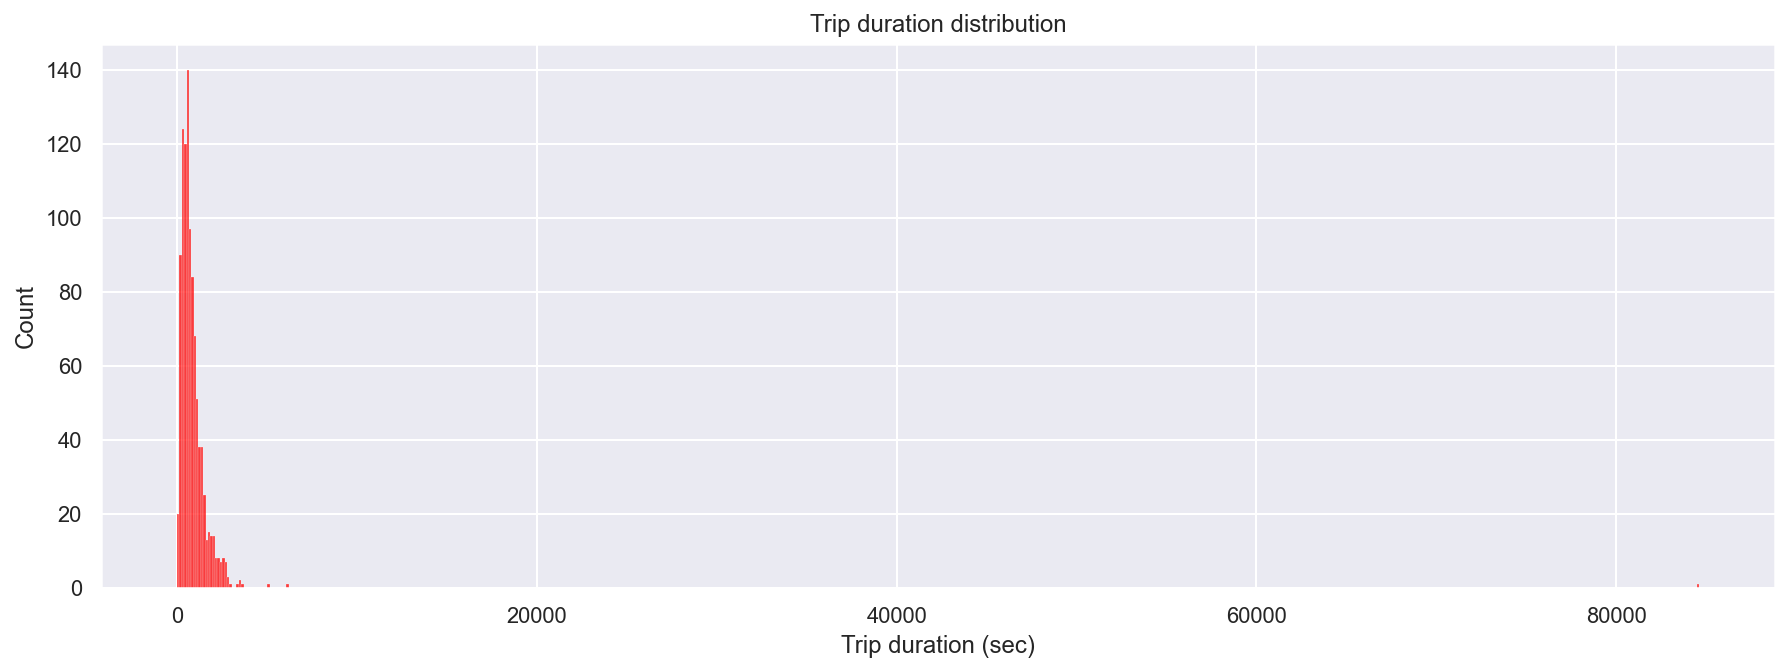

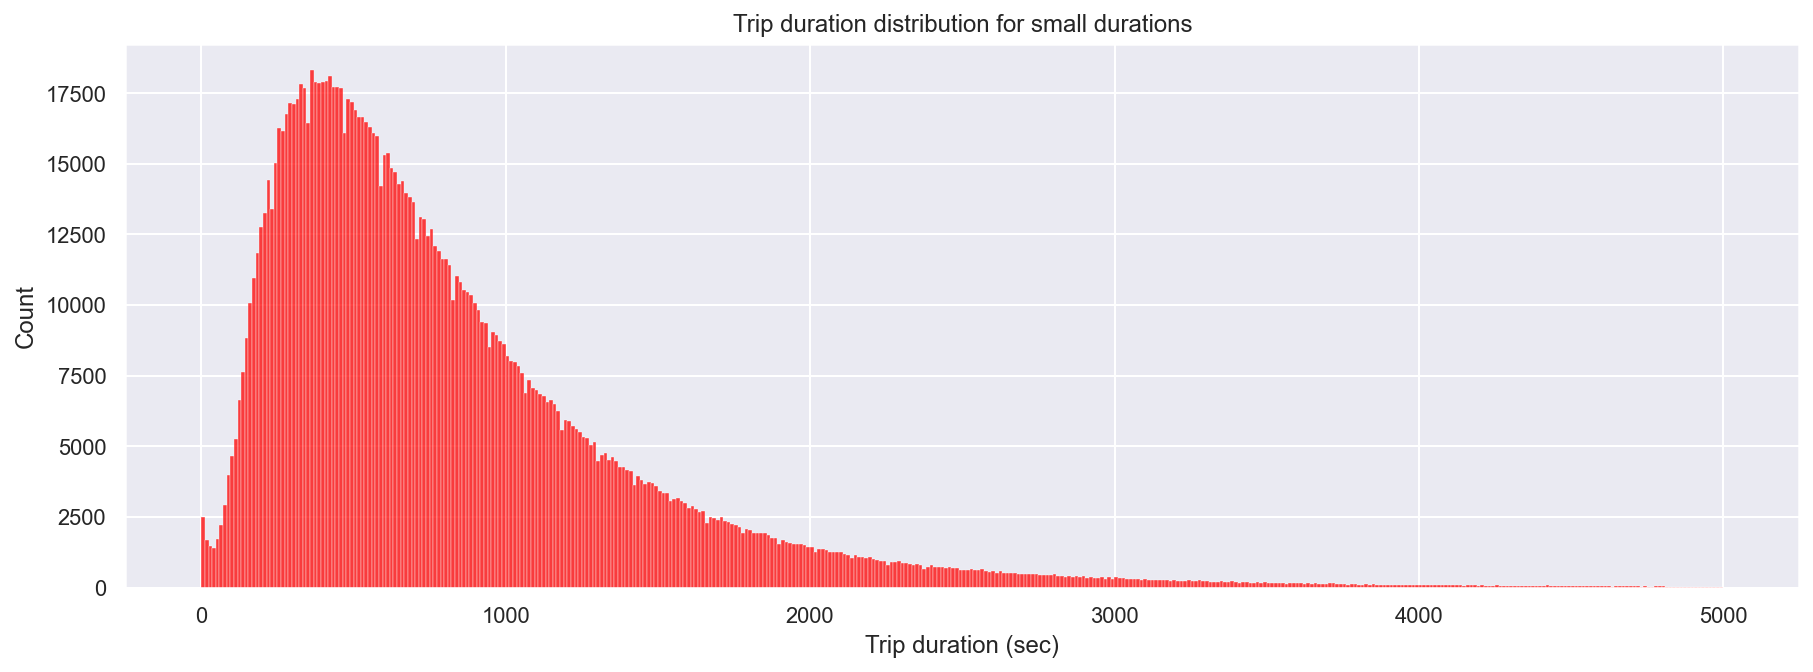

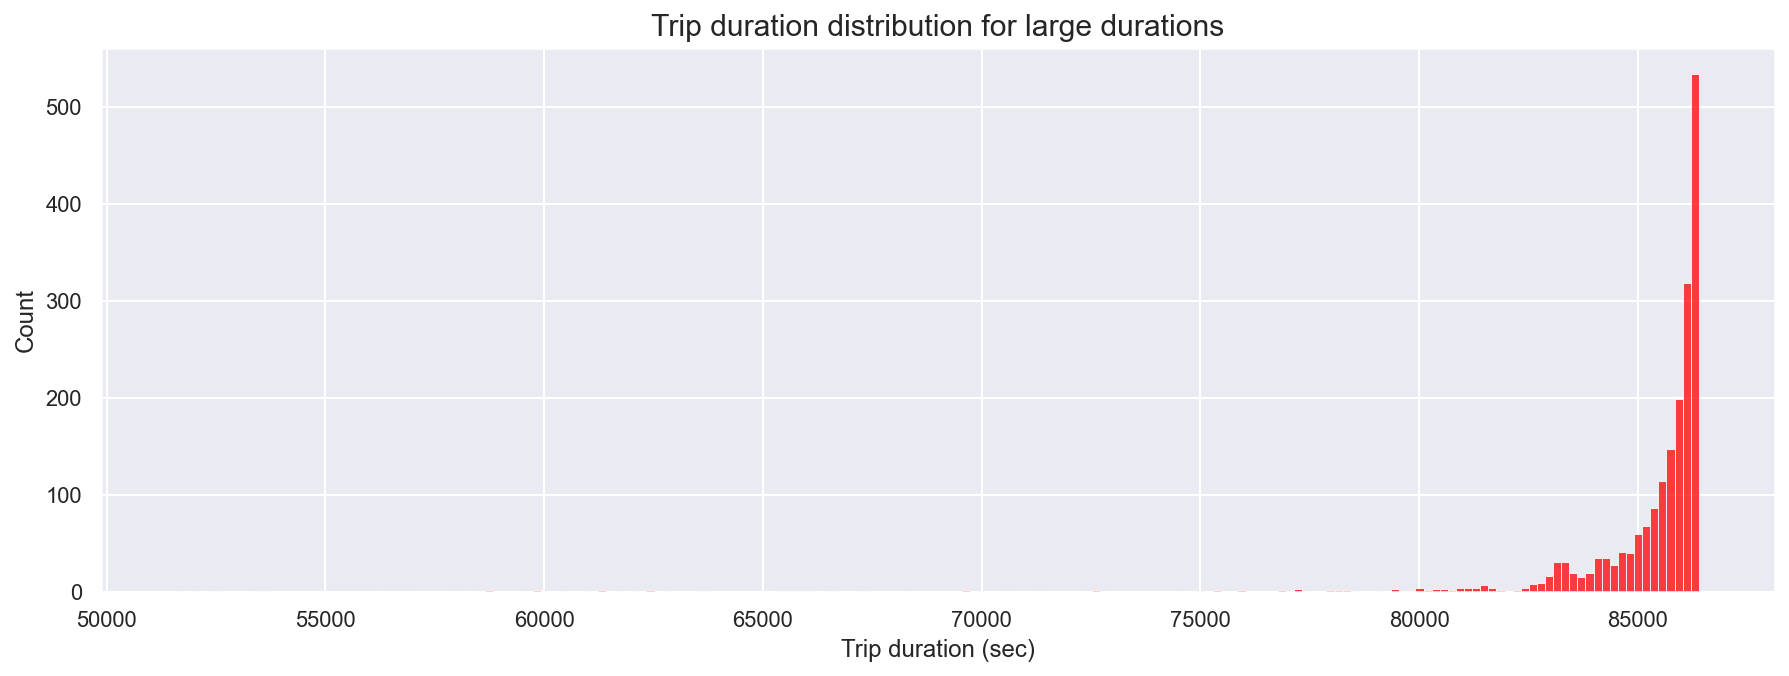

In [6]:
figall, durn_hist = plt.subplots(figsize = (15,5))

durn_hist = sns.histplot(data=data_X['trip_duration'].head(1000), color='red', legend=False)
durn_hist.set_title('Trip duration distribution')
durn_hist.set_xlabel('Trip duration (sec)')

figpt1, durn_hist1 = plt.subplots(figsize = (15,5))

durn_hist1 = sns.histplot(data=data_X[data_X['trip_duration']<5000]['trip_duration'], color='red', legend=False)
durn_hist1.set_title('Trip duration distribution for small durations')
durn_hist1.set_xlabel('Trip duration (sec)')

figpt2, durn_hist2 = plt.subplots(figsize = (15,5))

durn_hist2 = sns.histplot(data=data_X[(data_X['trip_duration']>50000) & (data_X['trip_duration']<90000)]['trip_duration'], color='red', legend=False)
durn_hist2.set_title('Trip duration distribution for large durations', fontsize=15)
durn_hist2.set_xlabel('Trip duration (sec)')

plt.show()

**Ответ:** *Распределение целевой переменной очень неравномерно: подавляющая масса значений лежит в слишком малом относительно всего промежутка возможных значений интервале. Т.е., присутствуют отличающиеся от основного значения на порядки выбросы.*

При решении данной задачи в качестве метрики качества использовалась RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему была выбрана в качестве метрики именно RMSLE, а не RMSE? (посмотрите внимательно на формулу и подумайте, почему она в данном конкретном случае, действительно будет являться подходящей метрикой)

**Ответ:** *RMLSE более аккуратно рассматривает случаи выбросов, т.к. в сравнении с RMSE меняется более плавно, и не зависит от порядка переменных x_i,y_i.*

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, а точнее сказать модификации линейной регресии,и каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ



В итоге, наша рассматриваемая задача оптимизации RMSLE была сведена к задаче оптимизации MSE, которую мы вполне умеем решать. Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [7]:
import numpy as np

data_X['log_trip_duration'] = np.log1p(data_X['trip_duration'])
data_X = data_X.drop(columns=['trip_duration'])

In [8]:
data_X.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,5.834811
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,7.347300
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,5.545177
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,7.111512


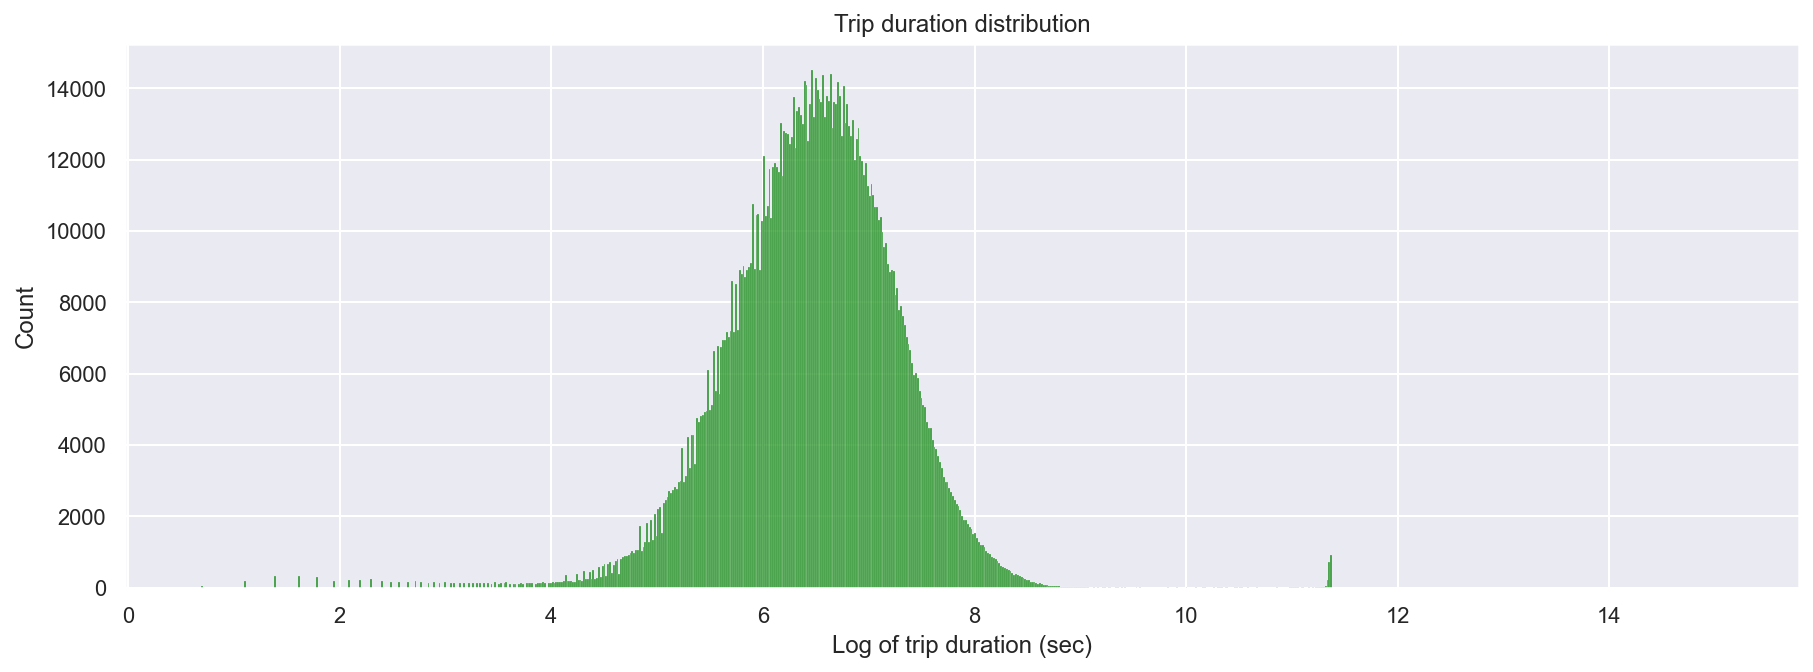

In [9]:
figall, log_durn_hist = plt.subplots(figsize = (15,5))

log_durn_hist = sns.histplot(data=data_X['log_trip_duration'], color='green', legend=False)
log_durn_hist.set_title('Trip duration distribution')
log_durn_hist.set_xlabel('Log of trip duration (sec)')

plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [68]:
data_y = data_X['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(data_X.drop(columns=['log_trip_duration']), data_y, 
                                                    test_size=0.3, random_state=1)

In [69]:
display(X_train.sample(5))
display(y_test.sample(5))

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
481946,id0800074,1,2016-03-03 20:51:04,1,-73.968758,40.750343,-73.962090,40.759518,N
321982,id1144677,2,2016-01-25 19:05:03,5,-73.870949,40.773739,-73.985039,40.744995,N
144477,id2269446,1,2016-05-25 15:08:23,1,-74.002022,40.729465,-73.998787,40.734489,N
646399,id1085149,2,2016-03-20 14:59:22,1,-73.994621,40.725857,-74.004723,40.707272,N
117067,id0435988,2,2016-03-03 20:42:15,2,-73.995728,40.739449,-74.013931,40.703178,N


396477     7.105786
349908     5.713733
1316799    6.152733
922193     6.107023
459029     7.284135
Name: log_trip_duration, dtype: float64

In [70]:
from sklearn.metrics import mean_squared_log_error

best_constant = y_train.mean()
print("Test RMSLE (constant)  = %.4f" % mean_squared_log_error(y_test, best_constant * np.ones(y_test.shape), squared=False))
print("Train RMSLE (constant) = %.4f" % mean_squared_log_error(y_train, best_constant * np.ones(y_train.shape), squared=False))

Test RMSLE (constant)  = 0.1130
Train RMSLE (constant) = 0.1135


# Часть 1 

                        Выделение признаков, визуализация и работа с `pickup_datetime` (3 балла)

**Задание 2 (0.5 баллов)**. Первое с чего стоит начать и кажется самым логичным --- это посмотреть, сколько всего было поездок в каждый из дней. Для этого Вам следует построить график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [15]:
data_X_days = data_X['pickup_datetime'].apply(lambda x: x.date()).sort_values()

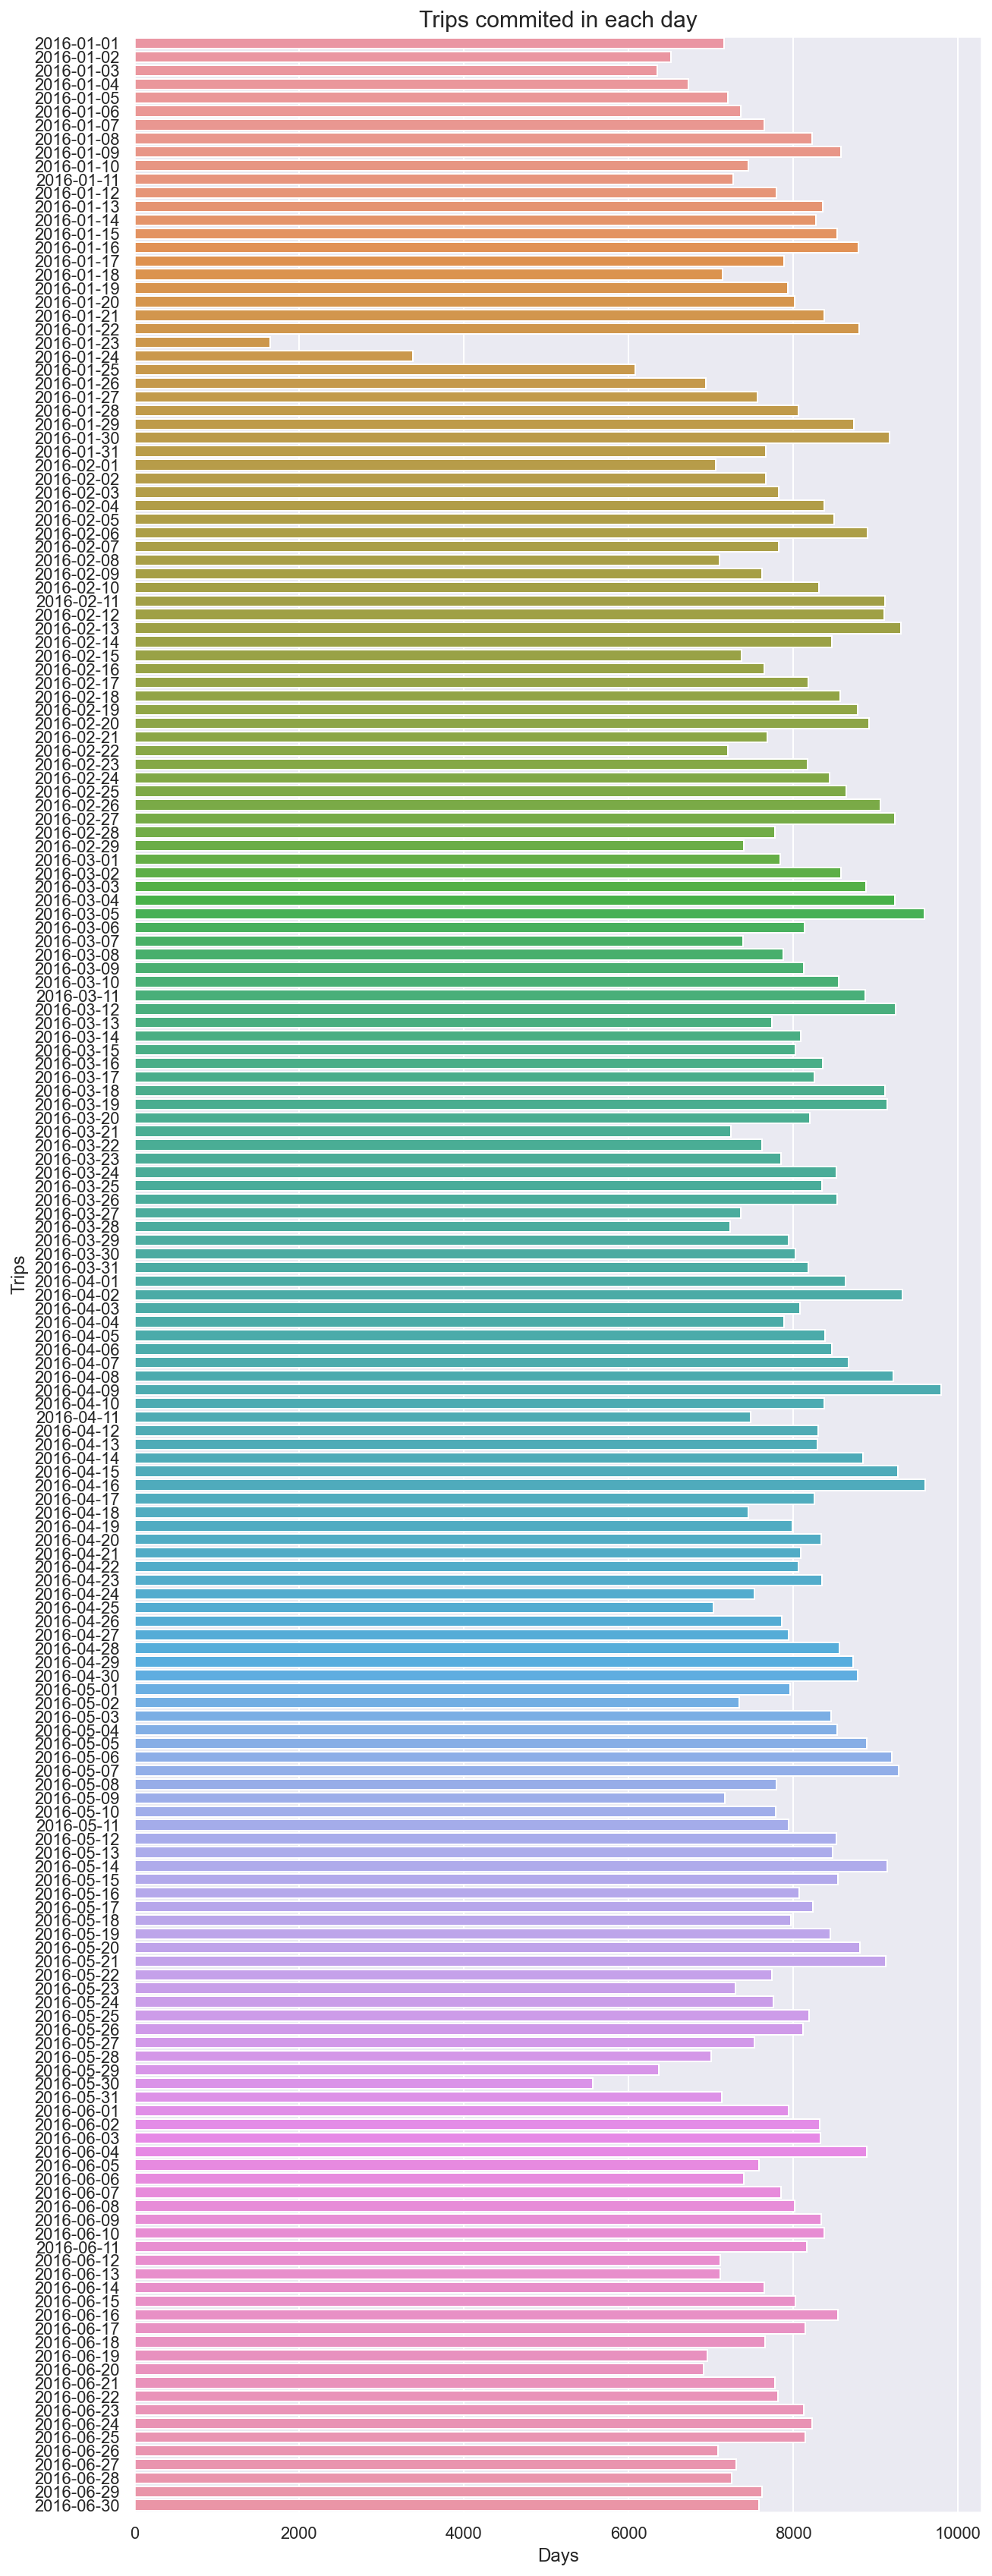

In [16]:
fig, def_plt = plt.subplots(figsize = (10,30))
def_plt = sns.countplot(y=data_X_days)

def_plt.set_title('Trips commited in each day', fontsize=15)
def_plt.set_ylabel('Trips')
def_plt.set_xlabel('Days')

plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [17]:
data_X_days.value_counts(ascending=True).head(4)

2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
Name: pickup_datetime, dtype: int64

**Ответ:** 
- *23 января было [официально запрещено](https://ria.ru/20160123/1364032228.html) передвигаться на автомобилях из-за сильной снежной бури.*
- *24 января, вероятно, снегоуборочные работы продолжались.*
- *30 мая 2016 г. в Нью-Йорке проходил [Memorial Day](https://brightonbeachnews.com/rus/2016/05/30/), устраиваемый в последний понедельник мая и объявленный выходным. Возможно, на движение также повлияли проводимые в рамках праздника парады, для которых перекрывались некоторые улицы.*

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [18]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June']

monts_hours = data_X.loc[:, ['pickup_datetime']]
monts_hours.loc[:, 'months'] = data_X['pickup_datetime'].apply(lambda x: x.month_name())
monts_hours.loc[:, 'hours'] = data_X['pickup_datetime'].apply(lambda x: x.hour)

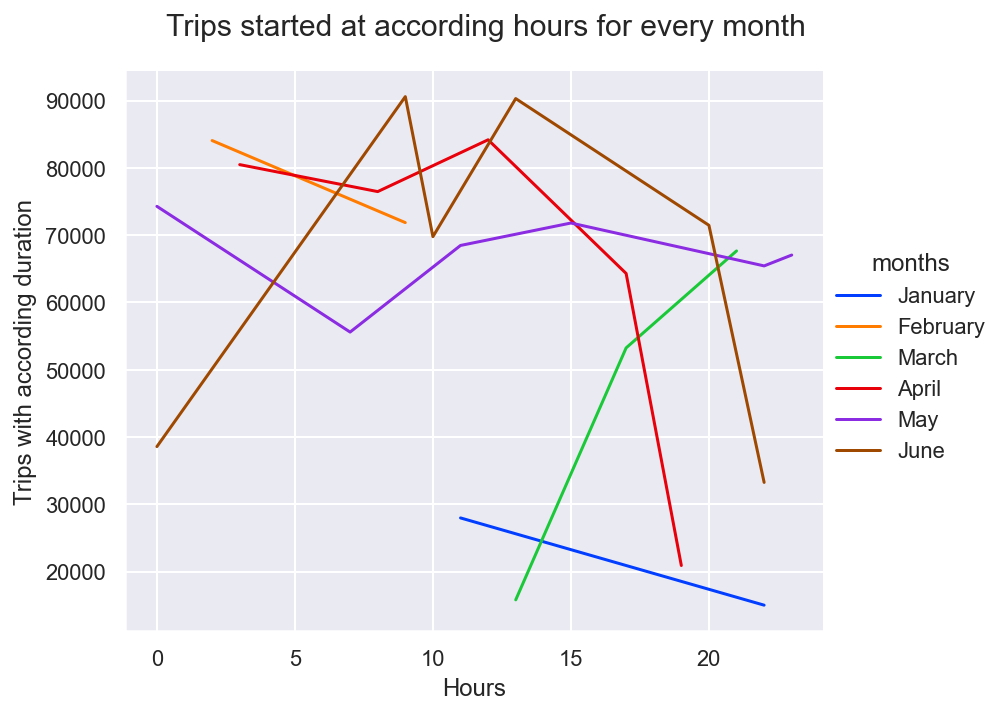

In [19]:
def_plt = sns.relplot(data=monts_hours, x='hours', y=monts_hours['hours'].value_counts(), 
                      kind='line', hue='months', hue_order=month_names, palette='bright', height=5, aspect=1.2)
          
def_plt.figure.subplots_adjust(top=0.9);
def_plt.figure.suptitle('Trips started at according hours for every month', fontsize=15)
def_plt.set_axis_labels('Hours', 'Trips with according duration')

plt.show()

In [20]:
wdnames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekdays_hours = data_X.loc[:, ['pickup_datetime']]
weekdays_hours.loc[:, 'weekday'] = data_X['pickup_datetime'].apply(lambda x: x.weekday()).apply(lambda  i: wdnames[i])
weekdays_hours.loc[:, 'hours'] = data_X['pickup_datetime'].apply(lambda x: x.hour)

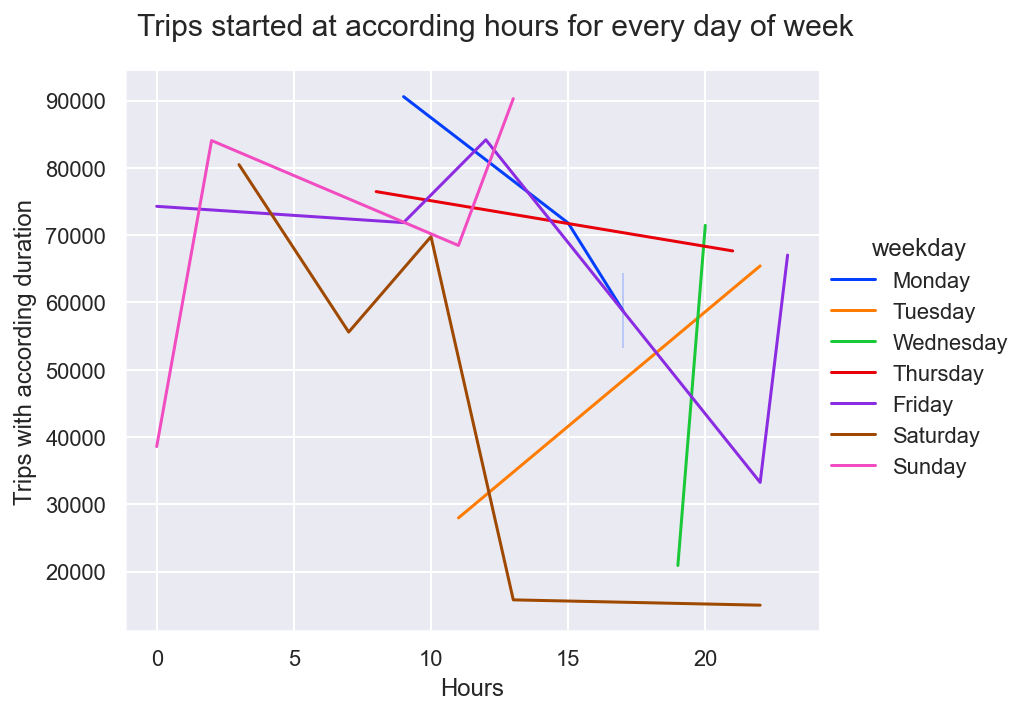

In [21]:
def_plt = sns.relplot(data=weekdays_hours, x='hours', y=weekdays_hours['hours'].value_counts(), 
                      kind='line', hue='weekday', hue_order=wdnames, palette='bright', height=5, aspect=1.2,)

def_plt.figure.subplots_adjust(top=0.9);
def_plt.figure.suptitle('Trips started at according hours for every day of week', fontsize=15)
def_plt.set_axis_labels('Hours', 'Trips with according duration')

plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:** 

- *Из **месяцев** особенно выделяется февраль (стабильно самые ранние поездки в сутках) и январь (стабильно самые поздние поездки и наименьшее число поездок за месяц в целом).*

*Возможно, в случае января резкое падение количества поездок обусловили упомянутые ранее снегопады, в какой-то момент совсем лишившие людей возможности пользоваться автомобилями, в т.ч. такси.*

- *Из **дней недели** стабильностью поездок уникальны пятница и суббота. С ними краткостью промежутка активности контрастирует среда - наименее активный в плане поездок на такси день из будних.*

*Динамика будних дней, судя по примерному совпадению временного интервала поездок, объяснима рабочим графиком. Вечер и ночь пятницы и утро субботы показывают высокий уровень востребованности такси - возможно, это следствие стремления жителей Нью-Йорка уезжать на отдых на выходные. Возвращение из таких поездок происходит утром или субботы, или воскресенья.*

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [22]:
weekdays_durn = y_train.copy().to_frame()
weekdays_durn['weekday'] = X_train['pickup_datetime'].apply(lambda x: x.weekday()).apply(lambda i: wdnames[i])

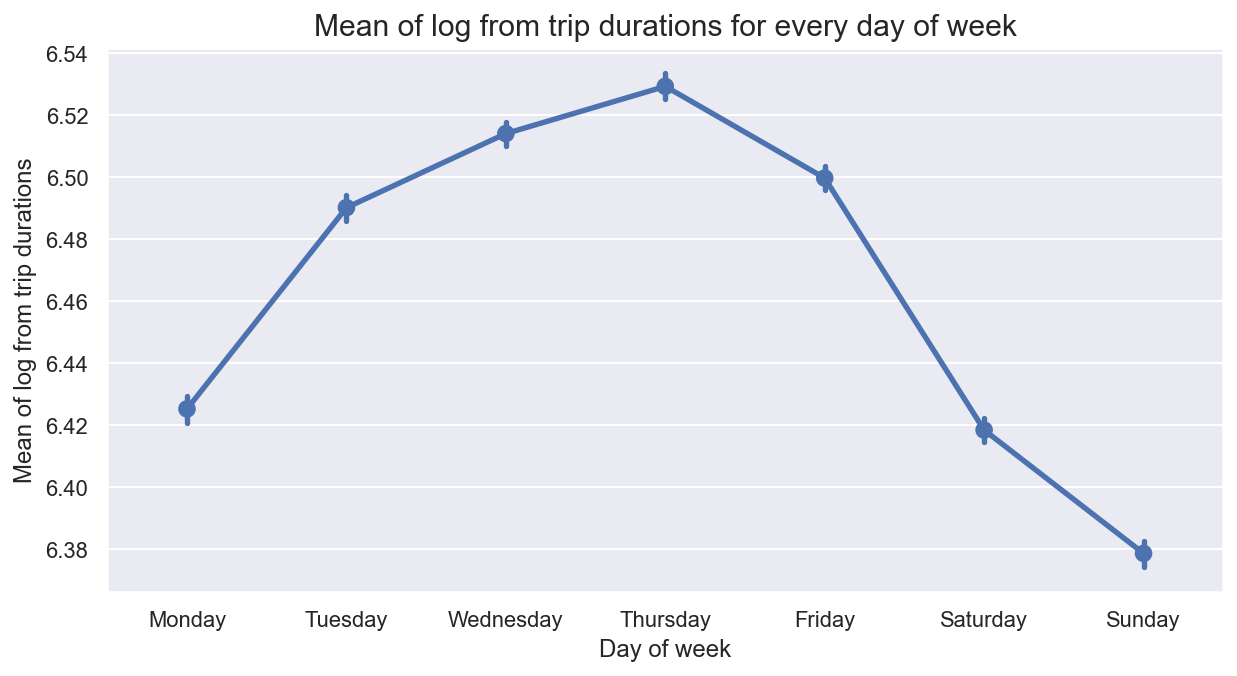

In [23]:
fig, hrs_plt = plt.subplots(figsize = (10,5))
hrs_plt = sns.pointplot(data=weekdays_durn, x='weekday', y='log_trip_duration', order=wdnames)

hrs_plt.set_title('Mean of log from trip durations for every day of week', fontsize=15)
hrs_plt.set_xlabel('Day of week')
hrs_plt.set_ylabel('Mean of log from trip durations')

plt.show()

In [24]:
days_hours_durn = X_train['pickup_datetime'].to_frame()
days_hours_durn.insert(loc=1, column='log_trip_duration', value=y_train)
days_hours_durn['day'] = days_hours_durn['pickup_datetime'].apply(lambda x: x.date())
days_hours_durn['hour'] = days_hours_durn['pickup_datetime'].apply(lambda x: x.time().hour)
days_hours_durn = days_hours_durn.sort_values(by='pickup_datetime')

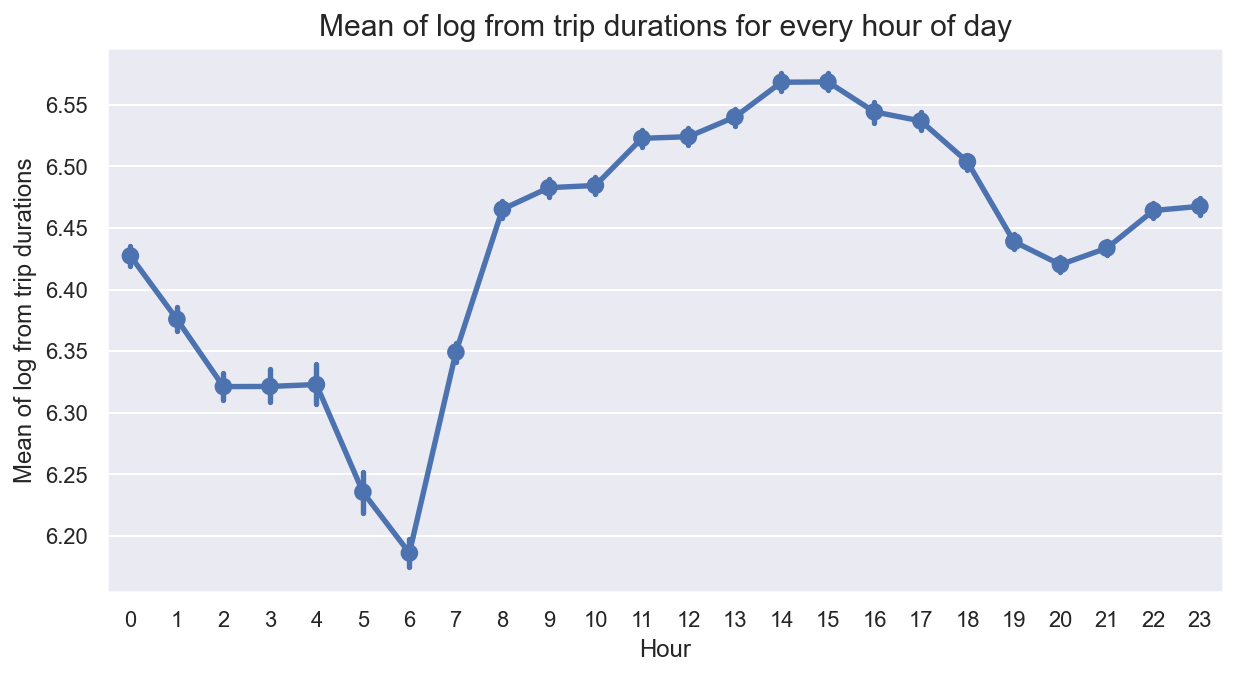

In [25]:
fig, hrs_plt = plt.subplots(figsize = (10,5))
hrs_plt = sns.pointplot(data=days_hours_durn, x='hour', y='log_trip_duration')

hrs_plt.set_title('Mean of log from trip durations for every hour of day', fontsize=15)
hrs_plt.set_xlabel('Hour')
hrs_plt.set_ylabel('Mean of log from trip durations')

plt.show()

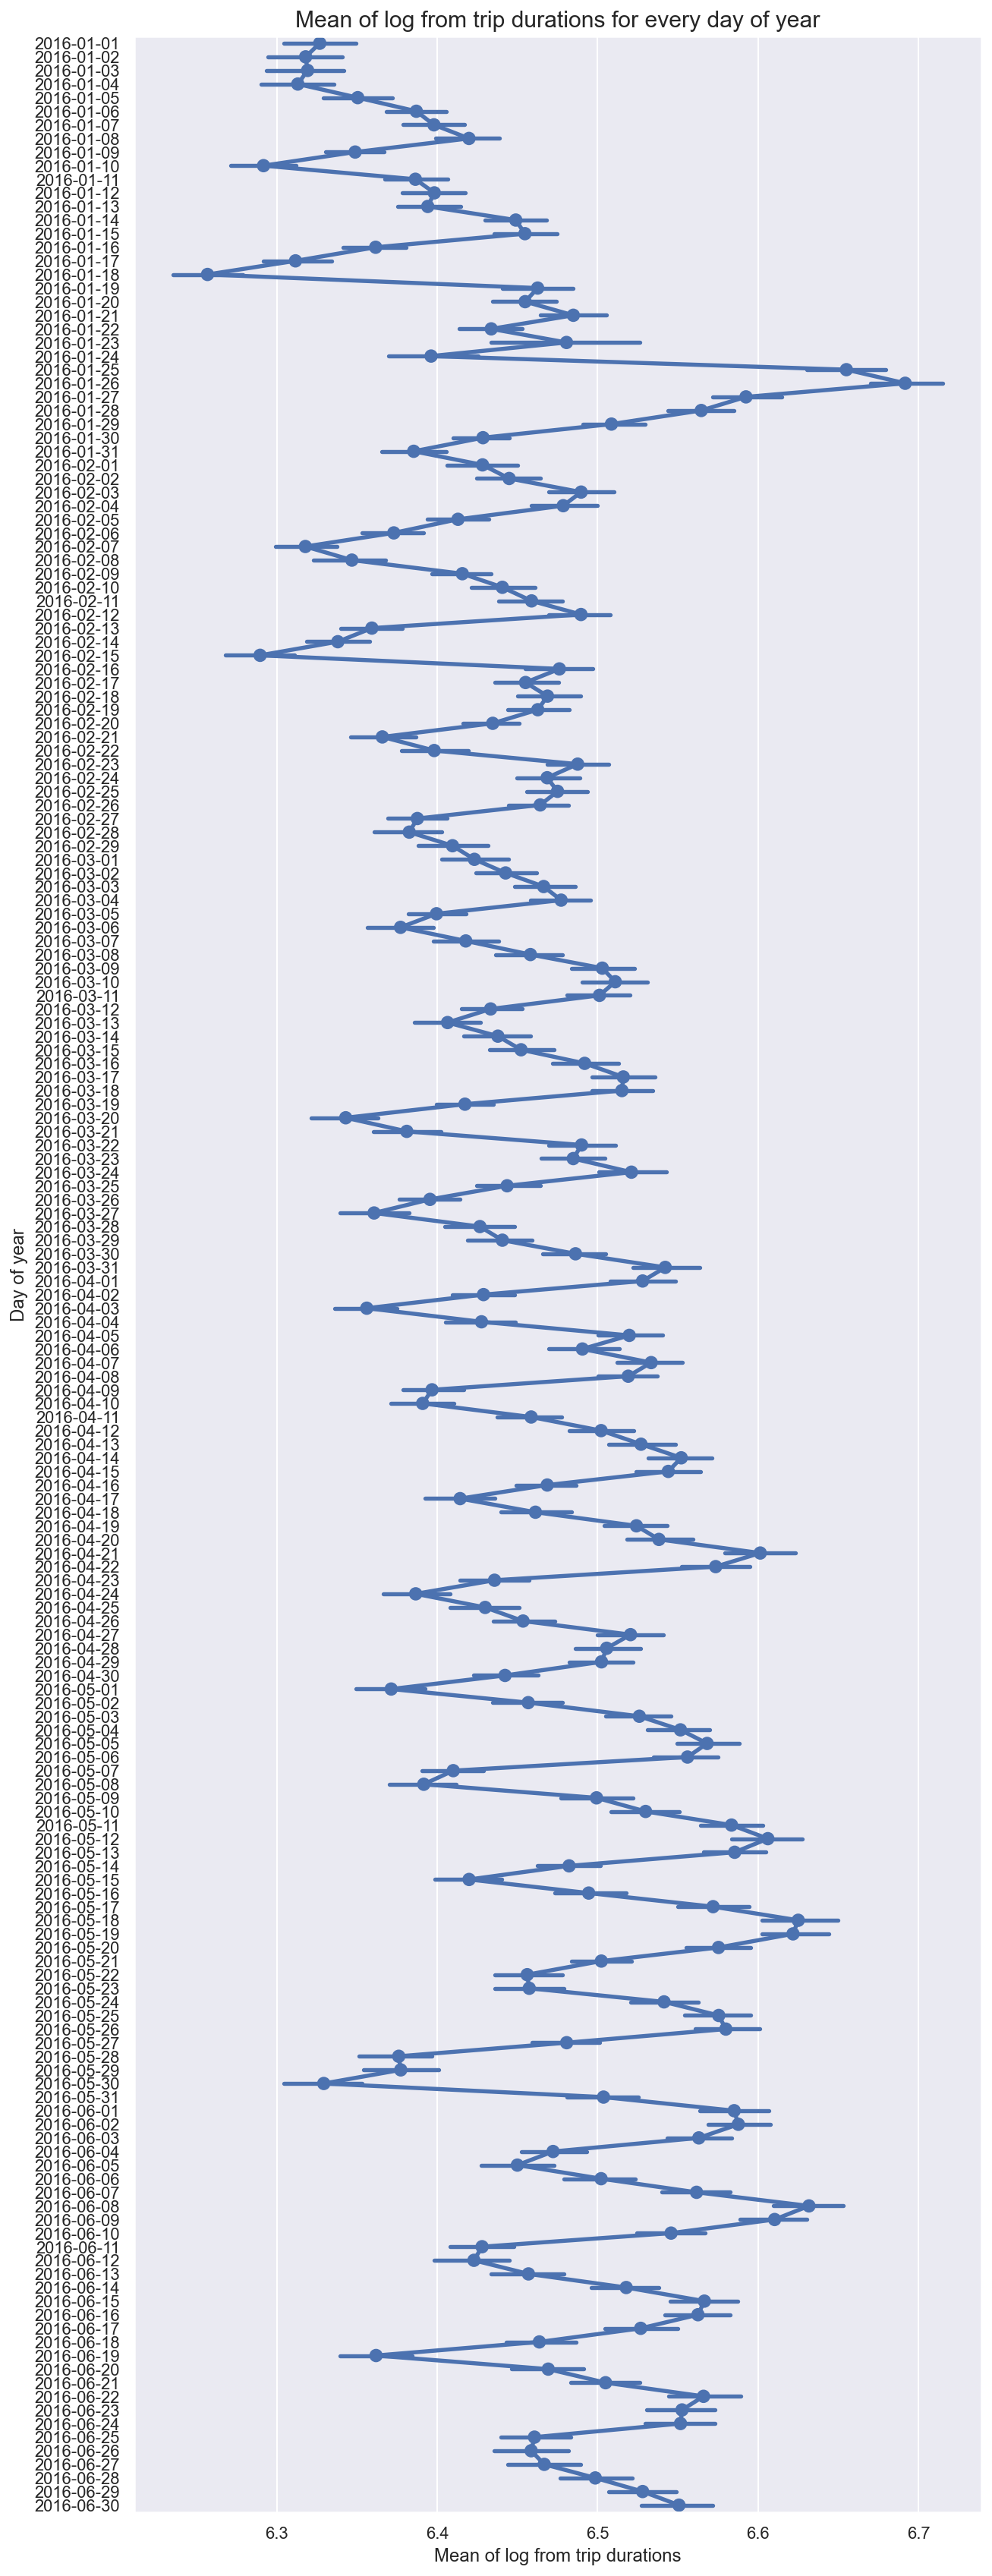

In [26]:
fig, hrs_plt = plt.subplots(figsize = (10,30))
hrs_plt = sns.pointplot(data=days_hours_durn, x='log_trip_duration', y='day')

hrs_plt.set_title('Mean of log from trip durations for every day of year', fontsize=15)
hrs_plt.set_xlabel('Mean of log from trip durations')
hrs_plt.set_ylabel('Day of year')

plt.show()

**Вопрос (0.5 баллов)**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** 
- *График зависимости таргета от часа в сутках коррелирует с аналогичным графиком для количества поездок следующим образом:* 
    - *с 2 часов ночи до 7 часов утра почти во всех месяцах (кроме января, для которого поездок в этот временной промежуток не зафиксировано впринципе) длительность поездок наименьшая за сутки*
    - *в это же время начинается наибольшее число поездок. Предположительно, в том числе это приводит к резкому росту длительности поездок в последующие часы - с 10 до 14.*
    - *около 14 часов количество поездок начинает спадать (исключение составляет март, в котором  количество поездок в это время внезапно и значительно растет). Высокие показатели длительности поездок сохраняются до 18.*
    - *количество поездок стабильно для почти всех месяцев (кроме марта) и в большинстве случаев достаточно резко снижается к концу рабочего дня. С ним снижается и длительность поездок, но незначительно.*
    - *количество поездок в начале ночи (в период 22-01) оказывается наименьшим во всех месяцах, кроме марта (здесь оно наибольшее) и мая (примерно равно среднему). Тем не менее, длительность поездок в эти часы немного возрастает перед резким падением в последующие.*

- *График зависимости таргета от дня недели коррелирует с аналогичным графиком для количества поездок следующим образом:* 
    - *В понедельник длительность поездок наименьшая из будних дней. Основное количество поездок на такси в этот день совершается с 9 до 15 часов, вечером резко спадает.*
    - *До четверга длительность поездок монотонно растет. Вместе с тем, количество поездок во вторник и среду меньше, чем в понедельник, и все поездки в выборке совершаются в течение рабочего дня во вторник и в самом конце рабочего дня - в среду.*
    - *Четверг, по-видимому, является наиболее загруженным днем: в нем достигается глобальный максимум средней продолжительности поездок и количество поездок стабильно высокое на протяжении всего рабочего дня.*
    - *В пятницу и выходные поездки совершаются практически в течение полных суток, но и длительность, и количество поездок к воскресенью падает.*
    
*Аномальные периоды - 23-24 января и 29-30 мая.* 
- *В январский аномальный период продолжительность поездок была средней, зато резко подскочила на следующий день после его окончания (возможно, ввиду погодных условий, т.к., судя по количеству поездок в эти дни, улицы не были нагружены транспортом).*
- *28-30 мая продолжительность поездок была аномально низкой. Видимо, граждане не стремились пользоваться такси как таковым.*

*График зависимости усредненного логарифма длительности поездок для каждого дня в году приблизительно периодичен: спады длительности стабильно наблюдаются в выходные, особенно в воскресенье, пики - ближе к середине недели. Также в теплых месяцах, мае и июне, длительность поездок в среднем выше и колеблется с большей амплитудой, чем зимой.*


Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [71]:
X_train = X_train.drop(columns=['id'])
X_train['weekday'] = X_train['pickup_datetime'].apply(lambda x: x.weekday())
X_train['month'] = X_train['pickup_datetime'].apply(lambda x: x.month)
X_train['hour'] = X_train['pickup_datetime'].apply(lambda x: x.time().hour)
X_train['is_anomaly_jan'] = (X_train['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (1,23)) | \
                            (X_train['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (1,24))
X_train['is_anomaly_may'] = (X_train['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (5,29)) | \
                            (X_train['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (5,30))


ds_in_ms = [31, 29, 31, 30, 31, 30]
def day_in_year_num(date):
    num = 0
    if (date.month == 1): return date.day
    for i in range (date.month-1): num += ds_in_ms[i]
    return num + date.day
    
X_train['day_number_in_year'] = X_train['pickup_datetime'].apply(day_in_year_num)

In [72]:
X_train.head(3)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,month,hour,is_anomaly_jan,is_anomaly_may,day_number_in_year
941504,1,2016-02-27 00:00:28,1,-74.005402,40.738270,-73.964195,40.684612,N,5,2,0,False,False,58
1026826,2,2016-01-24 18:49:08,1,-73.988663,40.722675,-73.981293,40.747349,N,6,1,18,True,False,24
557691,2,2016-01-08 07:38:04,1,-73.956551,40.813782,-73.959846,40.813782,N,4,1,7,False,False,8


In [73]:
X_test = X_test.drop(columns=['id'])
X_test['weekday'] = X_test['pickup_datetime'].apply(lambda x: x.weekday())
X_test['month'] = X_test['pickup_datetime'].apply(lambda x: x.month)
X_test['hour'] = X_test['pickup_datetime'].apply(lambda x: x.time().hour)
X_test['is_anomaly_jan'] = (X_test['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (1,23)) | \
                            (X_test['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (1,24))
X_test['is_anomaly_may'] = (X_test['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (5,29)) | \
                            (X_test['pickup_datetime'].apply(lambda x: (x.month, x.day)) == (5,30))


ds_in_ms = [31, 29, 31, 30, 31, 30]
def day_in_year_num(date):
    num = 0
    if (date.month == 1): return date.day
    for i in range (date.month-1): num += ds_in_ms[i]
    return num + date.day
    
X_test['day_number_in_year'] = X_test['pickup_datetime'].apply(day_in_year_num)

In [74]:
X_test.head(3)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,month,hour,is_anomaly_jan,is_anomaly_may,day_number_in_year
1457636,2,2016-02-27 20:13:05,1,-73.981728,40.749500,-73.945915,40.792061,N,5,2,20,False,False,58
615369,2,2016-06-04 09:54:05,1,-73.979088,40.771606,-73.946518,40.822655,N,5,6,9,False,False,156
491096,2,2016-05-06 17:40:05,1,-73.989700,40.738651,-73.997772,40.754051,N,4,5,17,False,False,127


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** *(все утверждения делаются применительно только к данной задаче)*
- *vendor_id - категориальный, т.к. он рассматривается как характеристика принадлежности к определенному классу.*
- *pickup_datetime - составной категориальный, т.к. не является числом в чистом виде и рассматривается в контексте разбиения объектов, поездок, на классы эквивалентности в зависимости от его полей.*
- *passenger_count - численный, т.к. количество пассажиров рассматривается как число, а не категория.*
- *pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude - численные, т.к. рассматриваются как количественные значения.*
- *store_and_fwd_flag - категориальный, т.к. обозначает принадлежность поездки одному из двух классов: сохранилась или нет поездка в памяти транспортного средства.*
- *weekday, month, hour - категориальные, т.к. обозначают принадлежность поездки определенному дню недели, месяцу и часу соответственно по времени совершения.*
- *is_anomaly_jan, is_anomaly_may - категориальные, т.к. обозначают принадлежность поездки одному из двух классов: совершенная в один из "аномальных" периодов или нет.*
- *day_number_in_year - численный, т.к. рассматривается как количественное значение*

**Задание 5 (1 балл)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [75]:
categorical_fs = ['vendor_id', 'pickup_datetime', 'store_and_fwd_flag', 'weekday', 'month', 'hour', 'is_anomaly_jan', 'is_anomaly_may']
numeric_fs = [feature for feature in list(X_train) if feature not in categorical_fs]

# print(categorical_fs)
# print(numeric_fs)

['vendor_id', 'pickup_datetime', 'store_and_fwd_flag', 'weekday', 'month', 'hour', 'is_anomaly_jan', 'is_anomaly_may']
['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_number_in_year']


In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_fs),
    ('scaling', StandardScaler(), numeric_fs)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

y_train_pred[y_train_pred < 0] = 0
y_pred[y_pred < 0] = 0
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train, y_train_pred, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test, y_pred, squared=False))

Train RMSLE = 0.0605
Test RMSLE = 0.1104


# Часть 2 
### Введение

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации. 

В этом разделе вам предстоит реализовать две различных вариации градиентного спуска и написать свою реализацию линейной регресии.

## Задание 1. Реализация градиентного спуска (4.5 балла)

Напишите собственные реализации различных подходов к градиентному спуску, опираясь на подготовленные шаблоны в файле `template_1.py`. **Стоит обратить внимание**, что все реализуемые методы должны быть векторизованы.

##### Небольшое отступление:

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. 

Более формальная запись: 

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Задание 1.1.1 Градиент MSE в матричном виде (0.5 балла).

На семинаре мы обсуждали дифференцирование функции потерь MSE в матричном виде.

Функция потерь MSE записывается в матричном виде так:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в свой конспект при наличии) градиент для функции потерь MSE в матричном виде

$$
    \omega = (X^T\cdot X)^{-1}\cdot X^T\cdot y
$$

### Задание 1.1.2 Вывести аналогично для Ridge-регрессии в матричном виде (1.5 балл)

$$
    Q(w) + \lambda * R(w) {,~где~} R(w) = ||w||^2_2
$$

In [30]:
# ваш ответ здесь

### Задание 1.2. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.3. Полный градиентный спуск VanillaGradientDescent (1 балл).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `template_1.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

##### Небольшое отступление:

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Если у нас будет размер выборки большим, то тогда это процесс становится очень трудоёмким. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.4. Стохастический градиентный спуск StochasticDescent (1 балл)

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$ w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}) $$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

## Задание 2. Реализация линейной регресии (1.5 балл)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `template_2.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [31]:
%load_ext autoreload

In [32]:
%autoreload 2

import numpy as np

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

ModuleNotFoundError: No module named 'descents'

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Творческий Бонус (0.5)

Наступило прекрасное время года - весна! Учиться - это, конечно, хорошо, но важно не забывать отдыхать, посвящать время себе и близким. Выберете рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека этим блюдом. Кратко опишите ваши впечатления, прикрепите рецепт, фотографии блюда и довольного гостя.

`### ваш кулинарный опыт здесь ###`

## Оценка работы 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ